In [3]:
import pandas as pd 
import seaborn as sns 
import sqlite3
import numpy as np
from plotly import express as px

In [4]:
with sqlite3.connect("../tickets.db") as conn: 
    cmd = "SELECT * FROM extraction"
    df = pd.read_sql_query(cmd, conn)
df

,id,price,time,name,extractTime,homeTeam,awayTeam,days_to_game
0,104722879,58.62,2021-06-11 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,2
1,104725408,29.16,2021-06-12 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,3
2,104725409,28.04,2021-06-13 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,4
3,104724531,35.55,2021-06-14 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,5
4,104725410,24.99,2021-06-15 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,6
...,...,...,...,...,...,...,...,...
458,104738380,17.17,2021-09-29 00:00:00,Arizona Diamondbacks at San Francisco Giants,2021-06-10 00:25:11.765629,San Francisco Giants,Arizona Diamondbacks,110
459,104736599,17.17,2021-09-30 00:00:00,Arizona Diamondbacks at San Francisco Giants,2021-06-10 00:25:11.765630,San Francisco Giants,Arizona Diamondbacks,111
460,104736601,46.19,2021-10-01 00:00:00,San Diego Padres at San Francisco Giants,2021-06-10 00:25:11.765632,San Francisco Giants,San Diego Padres,112
461,104738382,58.47,2021-10-02 00:00:00,San Diego Padres at San Francisco Giants,2021-06-10 00:25:11.765634,San Francisco Giants,San Diego Padres,113


<AxesSubplot:xlabel='days_to_game', ylabel='price'>

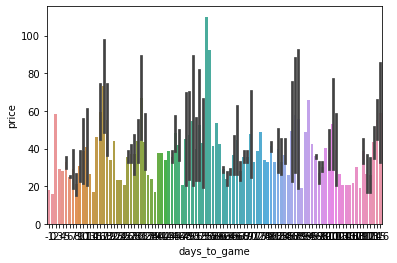

In [4]:
sns.barplot(x="days_to_game", y="price", data=df)

In [5]:
dodgers = df[df['homeTeam'] == 'Los Angeles Dodgers']

In [14]:
prices = dodgers["price"].to_numpy()
prices[1:] - prices[:-1]

array([-29.46,  -1.12,   7.51, -10.56,  14.3 ,   6.9 ,  -1.23,   3.96,
       -12.55,  -2.32,  10.1 , -11.46,  12.27, -15.95,   8.59,   0.  ,
        -3.68,   4.91,  -6.14,   6.14,  -4.91,  76.1 , -17.86, -50.88,
        12.28, -11.05,  -9.82,   0.  ,  38.05, -38.05,   6.14,   9.82,
       -14.73,  -1.23,   6.14,  -6.14,   8.77, -14.91,   5.78,  16.32,
        17.18, -23.32,  -5.97, -14.9 ,   6.22,  17.1 ,  -8.59,  -1.23,
         0.  ,   9.82, -12.27,  42.59, -38.93,  -1.82,   1.02, -12.68,
        16.81,   6.51,  -1.23,   3.96, -12.55,  -2.32,  10.1 , -11.46,
        12.27, -15.95,   8.59,   0.  ,  -3.68,   4.91,  -6.14,   6.14,
        -4.91,  76.1 , -17.86, -50.88,  12.28,  -8.6 , -12.27,   0.  ,
        38.05, -38.05,   6.14,   9.82, -14.73,  -1.23,   6.14,  -6.14,
         8.77, -14.91,   5.78,  16.32,  17.18, -23.32,  -5.97, -14.9 ,
         6.22,  17.1 ,  -8.59,  -1.23,   0.  ,   9.82, -12.27])

In [18]:
np.diff(prices) / prices[1:]

array([-1.01028807, -0.03994294,  0.21125176, -0.42256903,  0.3639603 ,
        0.14938298, -0.02735765,  0.08094849, -0.34506461, -0.0681351 ,
        0.22876557, -0.35056592,  0.27290925, -0.54981041,  0.22845745,
        0.        , -0.10849057,  0.12644862, -0.18782502,  0.15812516,
       -0.14475236,  0.69169242, -0.1937934 , -1.23255814,  0.22927558,
       -0.25993884, -0.30039768,  0.        ,  0.53788521, -1.16396452,
        0.15812516,  0.20184995, -0.43425708, -0.03762619,  0.15812516,
       -0.18782502,  0.21152918, -0.56158192,  0.17878132,  0.33545735,
        0.26097524, -0.54857681, -0.16338259, -0.68853974,  0.22325915,
        0.38033808, -0.23618367, -0.03500285,  0.        ,  0.21841637,
       -0.37534414,  0.56575452, -1.07097662, -0.05270779,  0.02869198,
       -0.55443813,  0.42363911,  0.1409396 , -0.02735765,  0.08094849,
       -0.34506461, -0.0681351 ,  0.22876557, -0.35056592,  0.27290925,
       -0.54981041,  0.22845745,  0.        , -0.10849057,  0.12

In [10]:
dodgers["pct_change"] = dodgers["price"].pct_change()
dodgers

<ipython-input-10-5a99182db01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dodgers["pct_change"] = dodgers["price"].pct_change()


,id,price,time,name,extractTime,homeTeam,awayTeam,days_to_game,pct_change
0,104722879,58.62,2021-06-11 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,2,NaN
1,104725408,29.16,2021-06-12 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,3,-0.502559
2,104725409,28.04,2021-06-13 00:00:00,Texas Rangers at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Texas Rangers,4,-0.038409
3,104724531,35.55,2021-06-14 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,5,0.267832
4,104725410,24.99,2021-06-15 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,6,-0.297046
...,...,...,...,...,...,...,...,...,...
202,104724625,36.37,2021-09-29 00:00:00,San Diego Padres at Los Angeles Dodgers,2021-06-09 12:10:15.524469,Los Angeles Dodgers,San Diego Padres,111,-0.191059
203,104724627,35.14,2021-09-30 00:00:00,San Diego Padres at Los Angeles Dodgers,2021-06-09 12:10:15.524471,Los Angeles Dodgers,San Diego Padres,112,-0.033819
204,104724629,35.14,2021-10-01 00:00:00,Milwaukee Brewers at Los Angeles Dodgers,2021-06-09 12:10:15.524472,Los Angeles Dodgers,Milwaukee Brewers,113,0.000000
205,104724631,44.96,2021-10-02 00:00:00,Milwaukee Brewers at Los Angeles Dodgers,2021-06-09 12:10:15.524474,Los Angeles Dodgers,Milwaukee Brewers,114,0.279454


In [23]:
df["pct_change"] = df["price"].pct_change()
df.groupby("days_to_game")[["price"]].apply(lambda X: X.pct_change)

ValueError: max() arg is an empty sequence

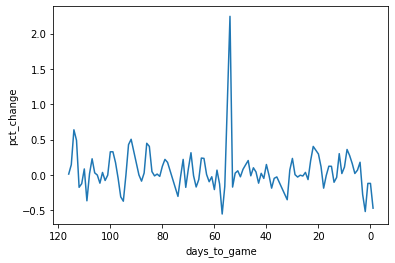

In [29]:
ax = sns.lineplot(x = "days_to_game", y = "pct_change", data = df.groupby("days_to_game")[["pct_change"]].mean().reset_index())
ax = ax.invert_xaxis()

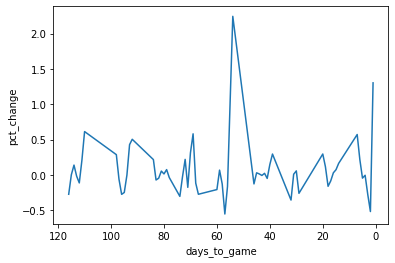

In [30]:
ax = sns.lineplot(x = "days_to_game", y = "pct_change", data = dodgers.groupby("days_to_game")[["pct_change"]].mean().reset_index())
ax = ax.invert_xaxis()

In [9]:
dodgers.pivot(index = "id", columns = "days_to_game", values = "price")

days_to_game,0,1,2,3,4,5,6,7,13,14,...,97,98,109,110,111,112,113,114,115,116
id,,,,,,,,,,,,,,,,,,,,,
104722879,94.05,75.28,58.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104722883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.19,46.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104722884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104722885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104722886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104724531,NaN,NaN,NaN,27.26,35.55,35.55,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104724572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104724574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104724575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dodgers[dodgers['id'] == 104725410]

,id,price,time,name,extractTime,homeTeam,awayTeam,days_to_game
4,104725410,24.99,2021-06-15 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-08 17:51:48.284897,Los Angeles Dodgers,Philadelphia Phillies,6
159,104725410,22.87,2021-06-15 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-09 12:10:15.524346,Los Angeles Dodgers,Philadelphia Phillies,5
313,104725410,24.99,2021-06-15 00:00:00,Philadelphia Phillies at Los Angeles Dodgers,2021-06-10 00:25:10.995245,Los Angeles Dodgers,Philadelphia Phillies,4
